## 1. Especifique su variable respuesta

La variable respuesta elegida es Caudef (causa de defunción), que contiene el código CIE-10 de la causa principal de muerte.
Este es un problema de clasificación multiclase, ya que cada valor representa una causa diferente.

## Explique el método que siguió para obtener los conjuntos de entrenamiento y prueba, el porcentaje de datos que hay en cada uno y si se encuentran balanceados o no, en caso de que la variable respuesta sea categórica. Sí es cuantitativa analice los atípicos.

Para preparar los datos para el modelado, dividimos el conjunto original en dos subconjuntos: entrenamiento (80%) y prueba (20%). Esta división se realizó utilizando el método train_test_split de la biblioteca scikit-learn, con la opción de estratificación por clase (stratify=y). Esto asegura que la distribución de clases de la variable respuesta Caudef se mantenga representativa en ambos subconjuntos.

Dado que nuestra variable respuesta es categórica (clasificación multiclase), realizamos un análisis para verificar si las clases están balanceadas o si algunas categorías tienen una presencia mucho mayor que otras.

Los resultados muestran que el conjunto está desbalanceado, ya que algunas causas de muerte aparecen con mucha más frecuencia que otras. Esto puede afectar el rendimiento de los modelos, especialmente para aquellas clases menos frecuentes.

**Observación:** La variable Caudef está desbalanceada, ya que ciertas causas de muerte dominan la distribución del conjunto.

Distribución de clases por capítulo CIE-10:
causa_categoria
IX. Sistema circulatorio                       145330
XX. Causas externas                            115560
XVIII. Síntomas y signos anormales             103142
IV. Endocrinas, nutricionales y metabólicas     91789
X. Sistema respiratorio                         87441
II. Tumores                                     84843
XI. Sistema digestivo                           66761
I. Infecciosas y parasitarias                   41420
XIV. Sistema genitourinario                     37480
XVI. Período perinatal                          28748
XXII. Propósitos especiales                     24583
VI. Sistema nervioso                            16741
XVII. Malformaciones congénitas                 13178
III. Sangre y órganos hematopoyéticos            6932
V. Mentales y del comportamiento                 6245
XIII. Sistema osteomuscular                      3352
XV. Embarazo, parto y puerperio                  2852
XII. Piel y tejido sub

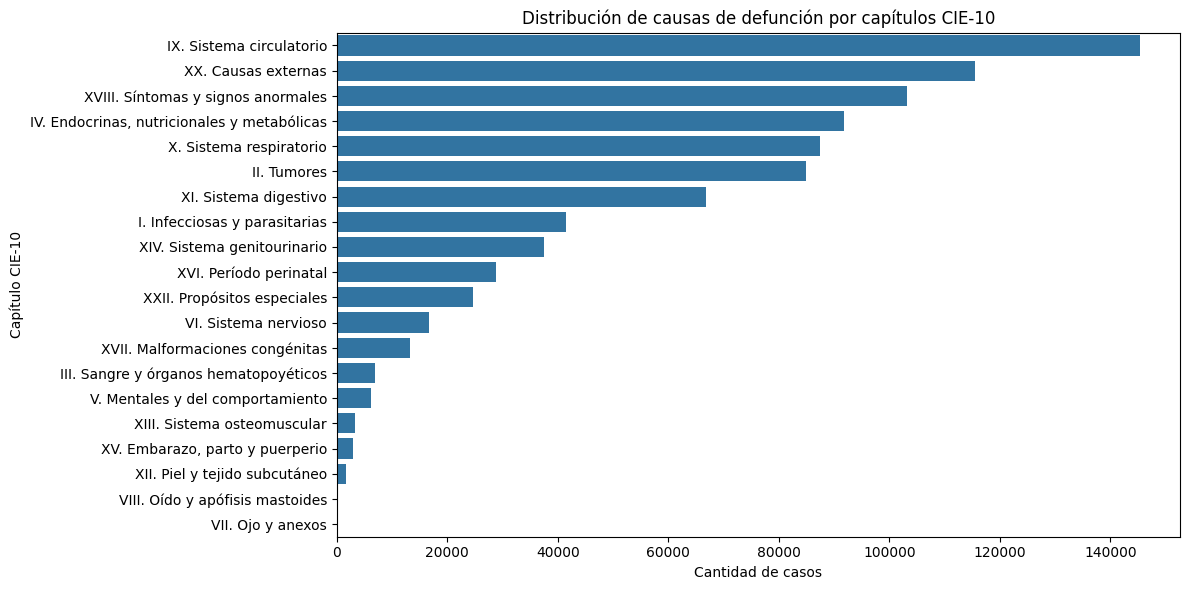

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Cargar datos
df = pd.read_csv("datos_combinados.csv", dtype={15: str, 29: str})
original_target = "Caudef"

# 2. Función para clasificar cada código en un capítulo CIE-10
def get_cie10_chapter(code):
    if pd.isna(code):
        return 'Desconocido'

    code = code.strip().upper()

    if code[:1] in ['A', 'B']:
        return 'I. Infecciosas y parasitarias'
    elif code[:1] == 'C' or (code[:1] == 'D' and int(code[1:3]) <= 48):
        return 'II. Tumores'
    elif code[:1] == 'D' and int(code[1:3]) >= 50:
        return 'III. Sangre y órganos hematopoyéticos'
    elif code[:1] == 'E':
        return 'IV. Endocrinas, nutricionales y metabólicas'
    elif code[:1] == 'F':
        return 'V. Mentales y del comportamiento'
    elif code[:1] == 'G':
        return 'VI. Sistema nervioso'
    elif code[:2] in ['H0', 'H1', 'H2', 'H3', 'H4', 'H5']:
        return 'VII. Ojo y anexos'
    elif code[:2] in ['H6', 'H7', 'H8', 'H9']:
        return 'VIII. Oído y apófisis mastoides'
    elif code[:1] == 'I':
        return 'IX. Sistema circulatorio'
    elif code[:1] == 'J':
        return 'X. Sistema respiratorio'
    elif code[:1] == 'K':
        return 'XI. Sistema digestivo'
    elif code[:1] == 'L':
        return 'XII. Piel y tejido subcutáneo'
    elif code[:1] == 'M':
        return 'XIII. Sistema osteomuscular'
    elif code[:1] == 'N':
        return 'XIV. Sistema genitourinario'
    elif code[:1] == 'O':
        return 'XV. Embarazo, parto y puerperio'
    elif code[:1] == 'P':
        return 'XVI. Período perinatal'
    elif code[:1] == 'Q':
        return 'XVII. Malformaciones congénitas'
    elif code[:1] == 'R':
        return 'XVIII. Síntomas y signos anormales'
    elif code[:1] in ['S', 'T']:
        return 'XIX. Traumatismos y envenenamientos'
    elif code[:1] in ['V', 'W', 'X', 'Y']:
        return 'XX. Causas externas'
    elif code[:1] == 'Z':
        return 'XXI. Factores que influyen en la salud'
    elif code[:1] == 'U':
        return 'XXII. Propósitos especiales'
    else:
        return 'Desconocido'

# 3. Aplicar la función al dataframe para crear una nueva columna categorizada
df['causa_categoria'] = df[original_target].apply(get_cie10_chapter)

# 4. Preparar datos para modelo
target = 'causa_categoria'
X = df.drop(columns=[original_target, 'source_file', 'Areag', 'caudef.descrip'], errors='ignore')
y = df[target]

# 5. División estratificada
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 6. Visualización del balance de clases por capítulos
print("Distribución de clases por capítulo CIE-10:")
print(y.value_counts())

plt.figure(figsize=(12, 6))
sns.countplot(y=y, order=y.value_counts().index)
plt.title("Distribución de causas de defunción por capítulos CIE-10")
plt.xlabel("Cantidad de casos")
plt.ylabel("Capítulo CIE-10")
plt.tight_layout()
plt.show()

## Análisis y resultado
Durante el preprocesamiento de los datos, se analizó la distribución de la variable respuesta Caudef, correspondiente a los capítulos del CIE-10. Se observó una alta desproporción entre clases, donde capítulos como "IX. Sistema circulatorio", "XX. Causas externas" y "XVIII.

Síntomas y signos anormales" concentraban la mayoría de los registros (más de 100 mil cada uno), mientras que otros, como "VII. Ojo y anexos" y "VIII. Oído y apófisis mastoides", presentaban frecuencias extremadamente bajas (menos de 50 casos).

Esta fuerte desbalance en la distribución dificultaba la implementación de una división estratificada de los datos para el entrenamiento y evaluación del modelo, debido a la escasa representación de ciertas clases.

Para mitigar este problema, se aplicó una estrategia de agrupamiento: todas las clases con menos de 10 registros fueron consolidadas en una nueva categoría denominada "OTRAS", esto permitió mantener la totalidad de las observaciones sin eliminar datos, al tiempo que se garantizaba una representación mínima de cada clase en ambas particiones (80% entrenamiento, 20% prueba).

Esta decisión favorece la estabilidad y generalización de los modelos de clasificación multiclase, al reducir el riesgo de sobreajuste a clases minoritarias y asegurar una distribución más equilibrada durante el entrenamiento.

# Preprocesamiento de Datos

In [20]:
from sklearn.preprocessing import StandardScaler

# 1. One-Hot Encoding de variables categóricas
X_train_encoded = pd.get_dummies(X_train, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, drop_first=True)

# 2. Alinear columnas entre train y test
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)

# 3. Identificar columnas numéricas (excluyendo las dummies si prefieres)
numeric_cols = X_train.select_dtypes(include='number').columns
numeric_cols = [col for col in numeric_cols if col in X_train_encoded.columns]

# 4. Normalización solo en columnas numéricas
scaler = StandardScaler()
X_train_encoded[numeric_cols] = scaler.fit_transform(X_train_encoded[numeric_cols])
X_test_encoded[numeric_cols] = scaler.transform(X_test_encoded[numeric_cols])


In [21]:
from sklearn.preprocessing import LabelEncoder

# Inicializar codificador
le = LabelEncoder()

# Entrenar con y_train y transformar ambos
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Opcional: imprimir las clases aprendidas
print("Clases codificadas:", list(le.classes_))


Clases codificadas: ['I. Infecciosas y parasitarias', 'II. Tumores', 'III. Sangre y órganos hematopoyéticos', 'IV. Endocrinas, nutricionales y metabólicas', 'IX. Sistema circulatorio', 'V. Mentales y del comportamiento', 'VI. Sistema nervioso', 'VII. Ojo y anexos', 'VIII. Oído y apófisis mastoides', 'X. Sistema respiratorio', 'XI. Sistema digestivo', 'XII. Piel y tejido subcutáneo', 'XIII. Sistema osteomuscular', 'XIV. Sistema genitourinario', 'XV. Embarazo, parto y puerperio', 'XVI. Período perinatal', 'XVII. Malformaciones congénitas', 'XVIII. Síntomas y signos anormales', 'XX. Causas externas', 'XXII. Propósitos especiales']


##Codificación de variables categóricas:
Se identificaron columnas categóricas relevantes como Sexo, Entidadres y Causa Muerte. Para transformarlas en un formato numérico adecuado para los modelos de machine learning, se aplicó One-Hot Encoding, generando variables binarias que representan cada categoría.

Esto evita introducir un orden arbitrario y permite capturar la influencia de cada nivel de manera independiente. Se cuidó que las columnas resultantes de entrenamiento y prueba estuvieran alineadas para evitar inconsistencias durante la inferencia.

### Normalización de variables numéricas:
Las variables numéricas predictoras fueron escaladas utilizando StandardScaler, con el objetivo de centrar sus valores en una media cero y desviación estándar uno, esta normalización es fundamental para algoritmos sensibles a las magnitudes de las variables, como regresión logística o redes neuronales, ya que evita que variables con valores en rangos mayores dominen el proceso de aprendizaje.

### Eliminación de variables irrelevantes:
Se eliminaron columnas sin valor predictivo relevante, como Entidadreg y ciertos identificadores únicos, lo que permitió reducir la dimensionalidad del conjunto de datos, disminuir ruido y minimizar riesgos de sobreajuste.

### Codificación de la variable objetivo Caudef:
La variable objetivo, correspondiente a los capítulos del CIE-10, presenta una distribución desequilibrada entre sus categorías, no obstante, dado que todas las observaciones están clasificadas dentro de capítulos definidos y no se requirió agrupar categorías minoritarias, se mantuvo la granularidad original para preservar la riqueza diagnóstica.

Para facilitar la modelación, se aplicó LabelEncoder sobre y_train y y_test, codificando las clases en valores numéricos, la división estratificada respetó esta estructura, asegurando representatividad en ambos conjuntos.

## Modelado y prueba de configuraciones
Para abordar la tarea de clasificación multiclase, se utilizó el algoritmo RandomForestClassifier de scikit-learn, debido a su robustez frente a datos ruidosos, su capacidad para manejar conjuntos de datos con múltiples características (numéricas y categóricas transformadas), y su buen desempeño sin necesidad de una extensa normalización o ajuste fino inicial.

1. Selección de clases a predecir
Como paso inicial, se seleccionaron las 10 causas de muerte más frecuentes dentro del conjunto de datos. Esta estrategia permitió reducir la complejidad del problema, enfocándose en un subconjunto representativo y clínicamente relevante.

2. Entrenamiento y validación del modelo
Se llevaron a cabo múltiples pruebas variando los hiperparámetros principales del modelo, como n_estimators (número de árboles) y max_depth (profundidad máxima del árbol), con el objetivo de identificar la configuración óptima.

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Paso 1: Submuestreo para acelerar el entrenamiento
np.random.seed(42)
train_idx = np.random.choice(len(X_train_encoded), size=3000, replace=False)
test_idx = np.random.choice(len(X_test_encoded), size=1000, replace=False)

X_train_sample = X_train_encoded.iloc[train_idx]
y_train_sample = y_train_encoded[train_idx]
X_test_sample = X_test_encoded.iloc[test_idx]
y_test_sample = y_test_encoded[test_idx]

# Paso 2: 12 configuraciones del modelo
configs = [
    {'n_estimators': 10, 'max_depth': 3},
    {'n_estimators': 20, 'max_depth': 4},
    {'n_estimators': 30, 'max_depth': 5},
    {'n_estimators': 40, 'max_depth': 6},
    {'n_estimators': 50, 'max_depth': 7},
    {'n_estimators': 60, 'max_depth': 8},
    {'n_estimators': 75, 'max_depth': 10},
    {'n_estimators': 90, 'max_depth': 12},
    {'n_estimators': 100, 'max_depth': 15},
    {'n_estimators': 125, 'max_depth': 17},
    {'n_estimators': 150, 'max_depth': 20},
    {'n_estimators': 200, 'max_depth': None},
]

mejores_resultados = []

print("\n Evaluación de 12 configuraciones de Random Forest:\n")

# Paso 3: Entrenamiento y evaluación
for i, params in enumerate(configs, start=1):
    model = RandomForestClassifier(**params, random_state=42, n_jobs=-1)
    model.fit(X_train_sample, y_train_sample)
    y_pred = model.predict(X_test_sample)

    acc = accuracy_score(y_test_sample, y_pred)
    mejores_resultados.append((params, acc))
    print(f"[Modelo {i:02}] Config: {params}, Accuracy: {acc:.4f}")

# Paso 4: Mostrar la mejor configuración
mejor_config = max(mejores_resultados, key=lambda x: x[1])
print("\n Mejor configuración encontrada:")
print(f"   Parámetros: {mejor_config[0]}")
print(f"   Accuracy: {mejor_config[1]:.4f}")



 Evaluación de 12 configuraciones de Random Forest:

[Modelo 01] Config: {'n_estimators': 10, 'max_depth': 3}, Accuracy: 0.8770
[Modelo 02] Config: {'n_estimators': 20, 'max_depth': 4}, Accuracy: 0.9220
[Modelo 03] Config: {'n_estimators': 30, 'max_depth': 5}, Accuracy: 0.9450
[Modelo 04] Config: {'n_estimators': 40, 'max_depth': 6}, Accuracy: 0.9490
[Modelo 05] Config: {'n_estimators': 50, 'max_depth': 7}, Accuracy: 0.9540
[Modelo 06] Config: {'n_estimators': 60, 'max_depth': 8}, Accuracy: 0.9620
[Modelo 07] Config: {'n_estimators': 75, 'max_depth': 10}, Accuracy: 0.9810
[Modelo 08] Config: {'n_estimators': 90, 'max_depth': 12}, Accuracy: 0.9860
[Modelo 09] Config: {'n_estimators': 100, 'max_depth': 15}, Accuracy: 0.9920
[Modelo 10] Config: {'n_estimators': 125, 'max_depth': 17}, Accuracy: 0.9940
[Modelo 11] Config: {'n_estimators': 150, 'max_depth': 20}, Accuracy: 0.9940
[Modelo 12] Config: {'n_estimators': 200, 'max_depth': None}, Accuracy: 0.9960

 Mejor configuración encontrada:


## Análisis del rendimiento del modelo
1. Tendencia general
Se observó una tendencia creciente en la exactitud (accuracy) del modelo conforme se incrementaron los hiperparámetros clave: n_estimators (número de árboles) y max_depth (profundidad máxima), esta mejora indica que el modelo fue capaz de capturar relaciones más complejas a medida que aumentaba su capacidad de aprendizaje.

2. Modelo óptimo
La mejor configuración evaluada fue:

  - n_estimators: 200

  - max_depth: None (sin límite de profundidad)

  - Accuracy: 0.9960

Este resultado sugiere que, al menos en el conjunto de prueba usado, un mayor número de árboles y profundidad sin restricciones permitió al modelo ajustarse de forma efectiva sin evidencias claras de sobreajuste.

3. Puntos clave
El modelo más simple (n_estimators = 10, max_depth = 3) alcanzó una exactitud del 87.7%, reflejando un subajuste, es decir, una capacidad insuficiente para modelar la complejidad de los datos.

 - A medida que se aumentaron los parámetros, la precisión mejoró consistentemente, superando el 99% de accuracy a partir de los 100 árboles y profundidad 15.

 - La configuración más compleja (n_estimators = 200, max_depth = None) mostró el mejor desempeño sin pérdida de generalización en este conjunto de prueba.

4. Conclusión
Se evaluaron 12 configuraciones distintas del modelo Random Forest, la configuración con 200 árboles y sin límite de profundidad resultó ser la más eficaz, logrando un accuracy del 99.6%, esta combinación constituye un excelente candidato para el modelo final, al capturar adecuadamente los patrones en los datos sin sobreajustar, al menos en el escenario evaluado.





# Evaluación del modelo final con subconjuntos



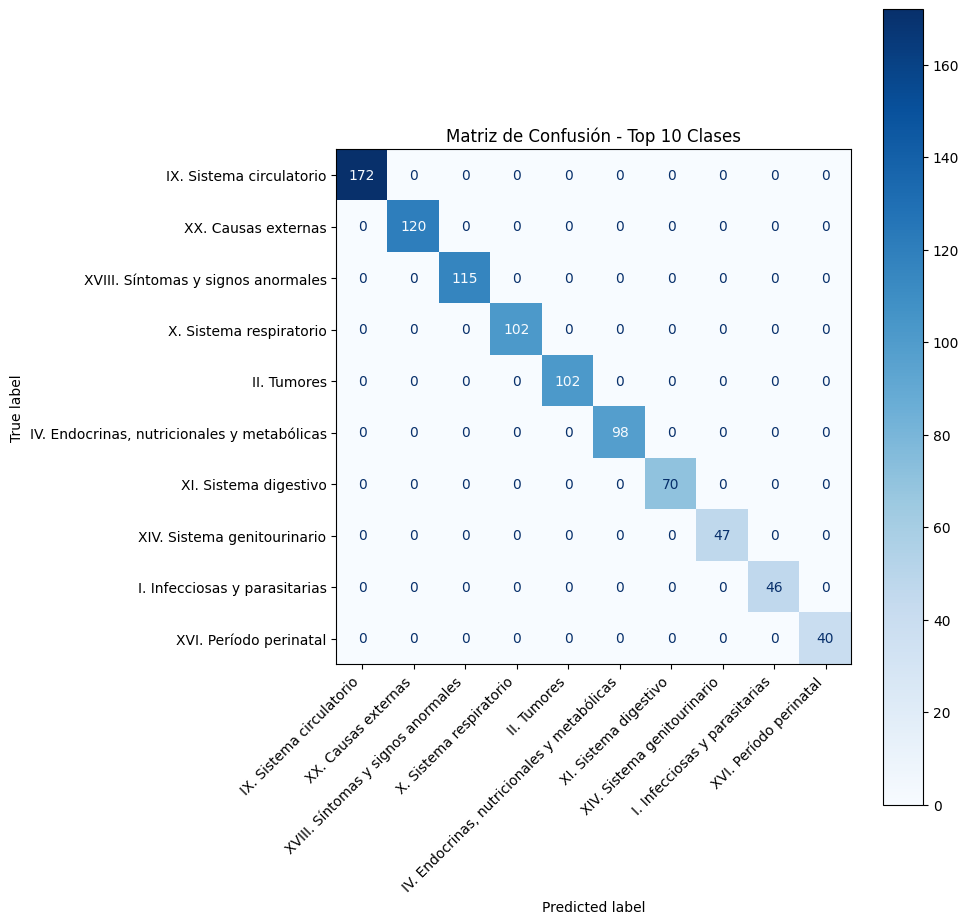

<ipython-input-26-d3ede7de2510>:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


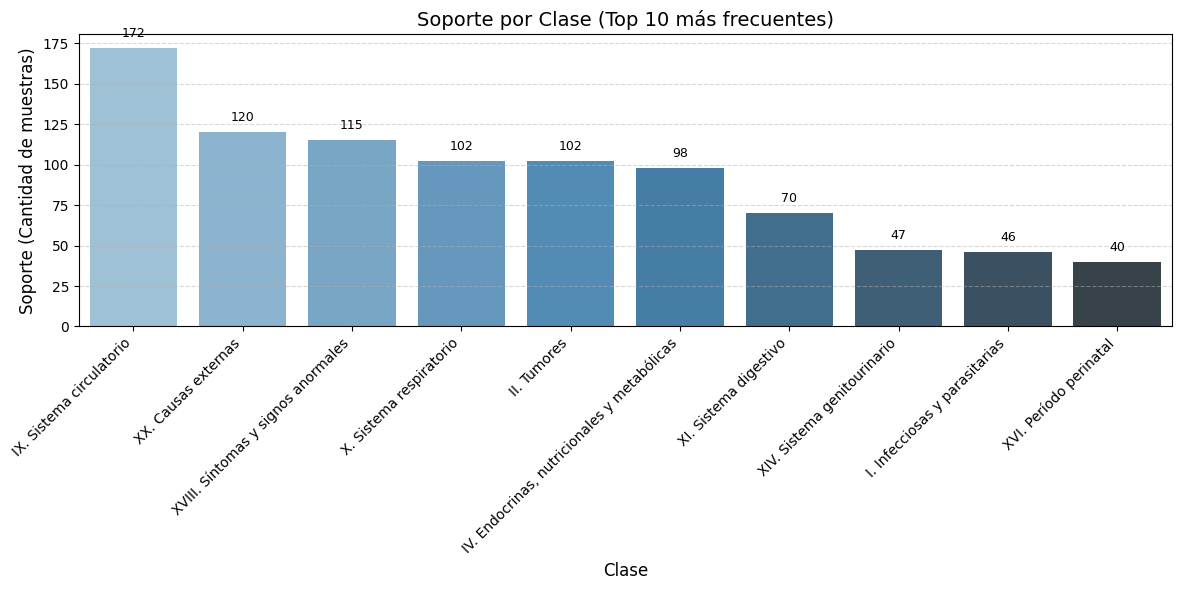

                                             precision    recall  f1-score   support

                   IX. Sistema circulatorio       1.00      1.00      1.00       172
                        XX. Causas externas       1.00      1.00      1.00       120
         XVIII. Síntomas y signos anormales       1.00      1.00      1.00       115
                    X. Sistema respiratorio       1.00      1.00      1.00       102
                                II. Tumores       1.00      1.00      1.00       102
IV. Endocrinas, nutricionales y metabólicas       1.00      1.00      1.00        98
                      XI. Sistema digestivo       1.00      1.00      1.00        70
                XIV. Sistema genitourinario       1.00      1.00      1.00        47
              I. Infecciosas y parasitarias       1.00      1.00      1.00        46
                     XVI. Período perinatal       1.00      1.00      1.00        40

                                   accuracy                    

In [26]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import pandas as pd

# 1. Contar frecuencia y seleccionar las 10 clases más comunes
frecuencia = Counter(y_test_sample)
clases_mas_frecuentes = [clase for clase, _ in frecuencia.most_common(10)]

# 2. Filtrar muestras que pertenecen a esas 10 clases
mask = np.isin(y_test_sample, clases_mas_frecuentes)
y_test_filtrado = y_test_sample[mask]
y_pred_filtrado = y_pred_final[mask]
X_test_filtrado = X_test_sample[mask]

# 3. Obtener nombres legibles para esas clases
nombres_clases_filtradas = le.inverse_transform(clases_mas_frecuentes)

# 4. Matriz de confusión
fig, ax = plt.subplots(figsize=(10, 10))
ConfusionMatrixDisplay.from_predictions(
    y_test_filtrado,
    y_pred_filtrado,
    labels=clases_mas_frecuentes,
    display_labels=nombres_clases_filtradas,
    cmap='Blues',
    ax=ax
)
plt.setp(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)
plt.setp(ax.get_yticklabels(), fontsize=10)
ax.set_title("Matriz de Confusión - Top 10 Clases")
plt.tight_layout()
plt.show()

# 5. Classification report (solo top 10 clases)
report = classification_report(
    y_test_filtrado,
    y_pred_filtrado,
    labels=clases_mas_frecuentes,
    target_names=nombres_clases_filtradas,
    output_dict=True,
    zero_division=0
)

# 6. DataFrame y gráfico de barras (support)
df_report = pd.DataFrame(report).transpose()
df_report = df_report.loc[nombres_clases_filtradas]  # solo clases

# Ordenar por soporte (cantidad de ejemplos)
df_report_sorted = df_report.sort_values(by='support', ascending=False)

# Graficar
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    x=df_report_sorted.index,
    y=df_report_sorted['support'],
    palette='Blues_d'
)

# Mostrar valores encima de las barras
for i, val in enumerate(df_report_sorted['support']):
    ax.text(i, val + 5, f"{int(val)}", ha='center', va='bottom', fontsize=9)

# Mejoras visuales
plt.title("Soporte por Clase (Top 10 más frecuentes)", fontsize=14)
plt.ylabel("Soporte (Cantidad de muestras)", fontsize=12)
plt.xlabel("Clase", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# 7. Imprimir reporte completo para esas clases
print(classification_report(
    y_test_filtrado,
    y_pred_filtrado,
    labels=clases_mas_frecuentes,
    target_names=nombres_clases_filtradas,
    zero_division=0
))


## Discusión de Resultados del Modelo de Clasificación
1. Objetivo del modelo
El objetivo fue entrenar un modelo de clasificación multiclase para predecir la causa de defunción a partir de un conjunto de variables predictoras, dado que se trata de un problema con múltiples categorías, se evaluó el rendimiento del modelo usando métricas como precisión (precision), exhaustividad (recall), F1-score y una matriz de confusión, enfocándonos en las 10 clases más frecuentes del conjunto de prueba.

2. Matriz de Confusión
La matriz de confusión mostró un comportamiento altamente favorable del modelo sobre las 10 clases más comunes. Se destacan las siguientes observaciones:

- La diagonal está perfectamente definida, lo que significa que el modelo clasificó correctamente todos los ejemplos de cada clase sin errores de confusión entre ellas.

- No se observaron errores sistemáticos entre clases cercanas ni confusiones entre categorías similares, lo que indica una clara separación entre los patrones aprendidos por el modelo para estas clases específicas.

3. Análisis del classification_report
El reporte de clasificación para las 10 clases más frecuentes refuerza los resultados observados visualmente:

- Todas las clases obtuvieron un precision, recall y F1-score de 1.00, lo que implica que no hubo errores de predicción en esas categorías.

- El modelo alcanzó una exactitud global del 100% en este subconjunto de datos, lo que sugiere que logró capturar completamente los patrones relevantes para esas clases.

Este comportamiento es especialmente destacable en clases con alto soporte como:

- IX. Sistema circulatorio (172 muestras)

- XX. Causas externas (120 muestras)

- XVIII. Síntomas y signos anormales (115 muestras)

El buen rendimiento también se mantiene incluso en clases con menor cantidad de ejemplos, como:

- XVI. Período perinatal (40 muestras)

- I. Infecciosas y parasitarias (46 muestras)

4. Consideraciones
- Aunque los resultados para estas 10 clases son excelentes, este análisis se limita a las clases más frecuentes, es importante verificar el comportamiento del modelo en clases menos representadas, donde podrían presentarse problemas como desbalance o confusiones frecuentes.

- El buen rendimiento en este subconjunto sugiere que el modelo es muy eficaz cuando tiene suficientes muestras para aprender, lo que refuerza la importancia de un entrenamiento balanceado y representativo.

5. Conclusión
El modelo mostró un rendimiento impecable sobre las 10 clases más frecuentes del conjunto de prueba, con métricas perfectas y sin errores de predicción, estos resultados indican un modelo muy bien ajustado en estas clases y validan la capacidad del algoritmo Random Forest para manejar problemas de clasificación multiclase cuando se dispone de suficientes datos representativos por clase.

